In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.set_option("display.max_row", 160)
pd.set_option("display.max_column", 160)

In [2]:
import plotly
import plotly.express as px

import plotly.offline as pyo
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [3]:
fp = r"C:\Users\kervi\Documents\DataScientest - PROJETS\00 PROJET WORLD HAPPINESS REPORT\projet_world_happiness_concatenation.csv"

In [4]:
df = pd.read_csv(fp)
df.head(5)

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,South Asia,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,South Asia,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,South Asia,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,South Asia,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


# Infos générales : 2098 lignes, 10 colonnes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Regional_indicator                2098 non-null   object 
 1   Country_name                      2098 non-null   object 
 2   year                              2098 non-null   int64  
 3   Life_Ladder                       2098 non-null   float64
 4   Log_GDP_per_capita                2062 non-null   float64
 5   Social_support                    2085 non-null   float64
 6   Healthy_life_expectancy_at_birth  2043 non-null   float64
 7   Freedom_to_make_life_choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions_of_corruption         1988 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 164.0+ KB


##  Présence de valeurs manquantes. Mais nous pouvons quand même faire une analyse exploratoire globale du dataset

# describe()

In [6]:
df_numeric = df.drop(["Regional_indicator","Country_name","year"], axis=1)

In [7]:
df_numeric.describe()

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,2098.000000,2062.000000,2085.000000,2043.000000,2066.000000,2009.000000,1988.000000
mean,5.471402,9.373060,0.812709,63.478503,0.746094,-0.001027,0.745650
std,1.112676,1.154247,0.118203,7.468780,0.140766,0.161400,0.186261
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,4.652250,8.470500,0.750000,58.704500,0.652000,-0.115000,0.688750
50%,5.392000,9.462000,0.835000,65.280000,0.767000,-0.027000,0.801000
75%,6.282500,10.360750,0.905000,68.660000,0.859000,0.089000,0.869000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000


### La note min de "Life_Ladder" est de 2.375 et la note max est de 8.019, pour une moyenne de 5.47

### 75% des scores se situent en_dessous de 6.282

### Globalement, les moyennes et les médianes sont proches, cela signifie généralement que la distribution des données est symétrique ou approximativement symétrique. Cela peut également indiquer que les valeurs aberrantes sont rares ou absentes dans les données.                                                                                                     

### Cela suggère également que les valeurs extrêmes ont peu d'impact sur la tendance centrale des données, ce qui peut être interprété comme un signe de stabilité ou de cohérence des données.

## Moyenne du score du bonheur dans le monde : 5.47

# Pays et régions

In [8]:
# nombre de pays et régions
display(df.Regional_indicator.unique())
len(df["Regional_indicator"].unique())

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Southeast Asia', 'East Asia'], dtype=object)

10

In [9]:
len(df["Country_name"].unique())

166

## 166 pays // 10 régions

# Evolution du score du bonheur

##  Evolution de la moyenne mondiale du score du bonheur : 2005 à 2021

In [10]:
df_mean_score_per_year = df.groupby("year", as_index=False)["Life_Ladder"].mean()

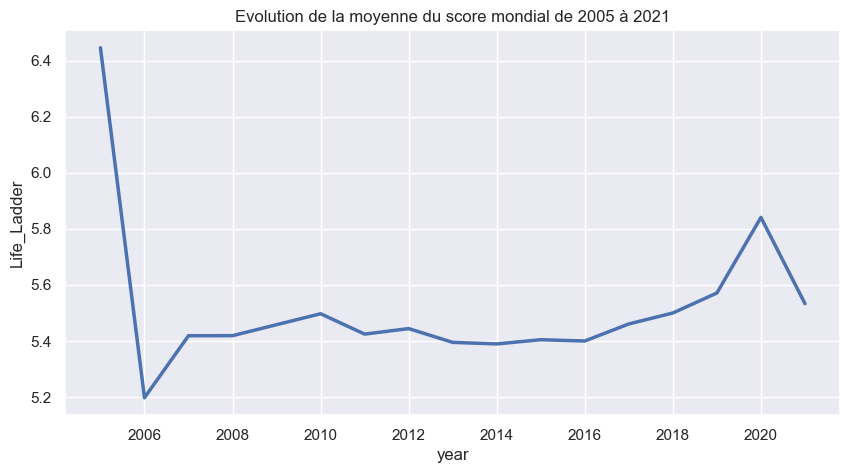

In [11]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
sns.lineplot(data=df_mean_score_per_year, x="year", y="Life_Ladder", linewidth=2.5)
plt.title("Evolution de la moyenne du score mondial de 2005 à 2021")
plt.show();

In [12]:
df_mean_score_per_year

,year,Life_Ladder
0,2005,6.446259
1,2006,5.196899
2,2007,5.418275
3,2008,5.418509
4,2009,5.457667
5,2010,5.496806
6,2011,5.424082
7,2012,5.443754
8,2013,5.394562
9,2014,5.389021


### Nombre de pays par an

In [13]:
nb_pays_par_an = df.groupby("year", as_index=False)["Country_name"].nunique()
dict_nb_pays_par_an = dict(zip(nb_pays_par_an["year"], nb_pays_par_an["Country_name"]))
df_nb_pays_par_an = pd.DataFrame(list(dict_nb_pays_par_an.items()), columns=["year", "nombre de pays"])
df_nb_pays_par_an

,year,nombre de pays
0,2005,27
1,2006,89
2,2007,102
3,2008,110
4,2009,114
5,2010,124
6,2011,146
7,2012,142
8,2013,137
9,2014,145


# Régions en 2005 et 2006

### 3 nouvelles régions : Commonwealth of independant States, Sub-Saharan Africa, Southeast Asia

In [14]:
df[(df.year==2005) | (df.year==2006)] \
.groupby(["Regional_indicator", "year"])[["Life_Ladder"]].mean()

Life_Ladder
Regional_indicator                 year             
Central and Eastern Europe         2005     5.567250
                                   2006     5.422200
Commonwealth of Independent States 2006     4.834727
East Asia                          2005     6.516000
                                   2006     5.398000
Latin America and Caribbean        2005     6.796000
                                   2006     5.581000
Middle East and North Africa       2005     5.676833
                                   2006     5.870400
North America and ANZ              2005     7.379500
                                   2006     7.243500
South Asia                         2005     5.225000
                                   2006     4.644750
Southeast Asia                     2006     5.239500
Sub-Saharan Africa                 2006     4.074182
Western Europe                     2005     7.083100
                                   2006     6.881625

### Pays pour ces 3 nouvelles régions en 2006

In [15]:
df.loc[(df.year==2006) & (df.Regional_indicator=="Commonwealth of Independent States"), "Country_name"]

52         Armenia
93      Azerbaijan
133        Belarus
591        Georgia
875     Kazakhstan
930     Kyrgyzstan
1123       Moldova
1440        Russia
1682    Tajikistan
1793       Ukraine
1866    Uzbekistan
Name: Country_name, dtype: object

In [16]:
df.loc[(df.year==2006) & (df.Regional_indicator=="Sub-Saharan Africa"), "Country_name"]

163            Benin
206         Botswana
245     Burkina Faso
278         Cameroon
313             Chad
621            Ghana
890            Kenya
1027      Madagascar
1038          Malawi
1063            Mali
1174      Mozambique
1253           Niger
1267         Nigeria
1455          Rwanda
1482         Senegal
1509    Sierra Leone
1566    South Africa
1697        Tanzania
1727            Togo
1778          Uganda
1920          Zambia
1934        Zimbabwe
Name: Country_name, dtype: object

In [17]:
df.loc[(df.year==2006) & (df.Regional_indicator=="South Asia"), "Country_name"]

118     Bangladesh
732          India
1197         Nepal
1615     Sri Lanka
Name: Country_name, dtype: object

### Liste nouveaux pays en 2006 + Liste pays 2005 qui ne sont plus présents en 2006

In [18]:
countries_2005 = df.loc[df["year"] == 2005, "Country_name"].unique()
countries_2006 = df.loc[df["year"] == 2006, "Country_name"].unique()
new_countries_2006 = []
deleted_countries_2006 = []

for i in countries_2006:
    if i not in countries_2005:
        new_countries_2006.append(i)
        
for c in countries_2005:
    if c not in countries_2006:
        deleted_countries_2006.append(c)

In [19]:
print(new_countries_2006)  # NOUVEAUX PAYS EN 2006
print()
print(len(new_countries_2006))

['Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'Georgia', 'Ghana', 'Guatemala', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'India', 'Indonesia', 'Ireland', 'Israel', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Moldova', 'Mozambique', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Palestinian Territories', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Portugal', 'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Sri Lanka', 'Switzerland', 'Taiwan Province of China', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Uganda', 'Ukraine', 'United Arab Emir

In [20]:
print(deleted_countries_2006) # PAYS DE 2005 QUI NE SONT PLUS DANS LE DATASET DE 2006
print()
print(len(deleted_countries_2006))

['Australia', 'Belgium', 'Brazil', 'Canada', 'Czech Republic', 'Denmark', 'Egypt', 'Germany', 'Greece', 'Hungary', 'Iran', 'Italy', 'Japan', 'Jordan', 'Mexico', 'Netherlands', 'Pakistan', 'Poland', 'Romania', 'Saudi Arabia', 'Spain', 'Sweden', 'Turkey', 'United Kingdom']

24


### Score du bonheur et PIB par région en 2006

In [21]:
df[df.year==2006] \
.groupby(["Regional_indicator", "year"])[["Life_Ladder", "Log_GDP_per_capita"]].mean()

,,Life_Ladder,Log_GDP_per_capita
Regional_indicator,year,,
Central and Eastern Europe,2006,5.422200,10.153200
Commonwealth of Independent States,2006,4.834727,8.976273
East Asia,2006,5.398000,10.091250
Latin America and Caribbean,2006,5.581000,9.163316
Middle East and North Africa,2006,5.870400,10.153000
North America and ANZ,2006,7.243500,10.725000
South Asia,2006,4.644750,8.114000
Southeast Asia,2006,5.239500,9.026500
Sub-Saharan Africa,2006,4.074182,7.673455


#### La mojorité des pays qui ont été rajoutés en 2006 semblent être des pays à  moyen ou faible PIB par habitant

### Score du bonheur et PIB par habitant par région en 2005 et 2006

In [22]:
df[(df.year==2005) | (df.year==2006)] \
.groupby(["Regional_indicator", "year"])[["Life_Ladder", "Log_GDP_per_capita"]].mean()

Life_Ladder  Log_GDP_per_capita
Regional_indicator                 year                                 
Central and Eastern Europe         2005     5.567250           10.001250
                                   2006     5.422200           10.153200
Commonwealth of Independent States 2006     4.834727            8.976273
East Asia                          2005     6.516000           10.529000
                                   2006     5.398000           10.091250
Latin America and Caribbean        2005     6.796000            9.513000
                                   2006     5.581000            9.163316
Middle East and North Africa       2005     5.676833            9.624667
                                   2006     5.870400           10.153000
North America and ANZ              2005     7.379500           10.655500
                                   2006     7.243500           10.725000
South Asia                         2005     5.225000            8.218000
                                   2006     4.644750            8.114000
Southeast Asia                     2006     5.239500            9.026500
Sub-Saharan Africa                 2006     4.074182            7.673455
Western Europe                     2005     7.083100           10.685400
                                   2006     6.881625           10.778125

#### On peut voir que les deux nouvelles régions "Commonwealth" et "Sub_Saharan Africa" ont un score du bonheur qui est en-dessous de 5. Le score du bonheur de Sub-Saharan Africa est particulièrement faible : 4.07

#### De plus on peut noter également que le PIB par habitant de "Sub-Saharan Africa" est très faible : 7.67

#### La grande majorité des régions ont un score du bonheur qui a baissé entre 2006 et 2005. Les baisses les plus importantes ont eu lieu pour les régions : "Latin America and Caribbean", "East Asia", "South Asia"

### Liste nouveaux pays en 2020 + Liste pays 2019 qui ne sont plus présents en 2020

In [23]:
countries_2019 = df.loc[df["year"] == 2019, "Country_name"].unique()
countries_2020 = df.loc[df["year"] == 2020, "Country_name"].unique()
new_countries = []
deleted_countries = []

for i in countries_2020:
    if i not in countries_2019:
        new_countries.append(i)
        
for c in countries_2019:
    if c not in countries_2020:
        deleted_countries.append(c)

In [24]:
print(new_countries)  # NOUVEAUX PAYS EN 2020
print()
print(len(new_countries))

['Czech Republic', 'Iraq']

2


In [25]:
print(deleted_countries) # PAYS DE 2019 QUI NE SONT PLUS DANS LE DATASET DE 2020
print()
print(len(deleted_countries))

['Afghanistan', 'Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Botswana', 'Burkina Faso', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Costa Rica', 'Gabon', 'Gambia', 'Guatemala', 'Guinea', 'Honduras', 'Indonesia', 'Jamaica', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mozambique', 'Nepal', 'Nicaragua', 'Niger', 'North Cyprus', 'Pakistan', 'Palestinian Territories', 'Panama', 'Paraguay', 'Peru', 'Romania', 'Rwanda', 'Senegal', 'Sierra Leone', 'Singapore', 'Sri Lanka', 'Swaziland', 'Togo', 'Turkmenistan', 'Uzbekistan', 'Vietnam', 'Yemen']

51


#### La majorité des pays qui ne sont plus dans le dataset en 2020 sont des pays avec un faible ou moyen score du bonheur

### Liste nouveaux pays en 2021 + Liste pays 2020 qui ne sont plus présents en 2021

In [26]:
countries_2020 = df.loc[df["year"] == 2020, "Country_name"].unique()
countries_2021 = df.loc[df["year"] == 2021, "Country_name"].unique()
new_countries = []
deleted_countries = []

for i in countries_2021:
    if i not in countries_2020:
        new_countries.append(i)
        
for c in countries_2020:
    if c not in countries_2021:
        deleted_countries.append(c)

In [27]:
print(new_countries)  # NOUVEAUX PAYS EN 2021
print()
print(len(new_countries))

['Luxembourg', 'Costa Rica', 'Guatemala', 'Singapore', 'Jamaica', 'Panama', 'Uzbekistan', 'Romania', 'Kuwait', 'Nicaragua', 'Honduras', 'Peru', 'Paraguay', 'North Cyprus', 'Belarus', 'Vietnam', 'Libya', 'Malaysia', 'Indonesia', 'Congo (Brazzaville)', 'Armenia', 'Nepal', 'Maldives', 'Azerbaijan', 'Senegal', 'Niger', 'Turkmenistan', 'Gambia', 'Guinea', 'Pakistan', 'Algeria', 'Gabon', 'Burkina Faso', 'Mozambique', 'Mali', 'Liberia', 'Lebanon', 'Palestinian Territories', 'Chad', 'Sri Lanka', 'Swaziland', 'Comoros', 'Mauritania', 'Madagascar', 'Togo', 'Sierra Leone', 'Burundi', 'Yemen', 'Haiti', 'Malawi', 'Lesotho', 'Botswana', 'Rwanda', 'Afghanistan']

54


In [28]:
print(deleted_countries) # PAYS DE 2020 QUI NE SONT PLUS DANS LE DATASET DE 2021
print()
print(len(deleted_countries))

[]

0


####  En 2021 on peut voir réapparaître des pays à faible score du bonheur.

## Cartes des pays présents par année

In [29]:
fig = px.choropleth(df.sort_values("year"), 
                    locations = "Country_name",
                    #color = "Regional_indicator",
                    locationmode = "country names",
                    animation_frame = "year"
                   )
fig.update_layout(title = "Pays")
fig.update_layout(width=1000, height=700)
fig.show()

## EVOLUTION DE LA MOYENNE DU SCORE DU BONHEUR ET DE LA MOYENNE DU PIB PAR HABITANT DANS LE MONDE DE 2005 A 2021

In [30]:
df_mean_pib_per_year = df.groupby("year", as_index=False)["Log_GDP_per_capita"].mean()

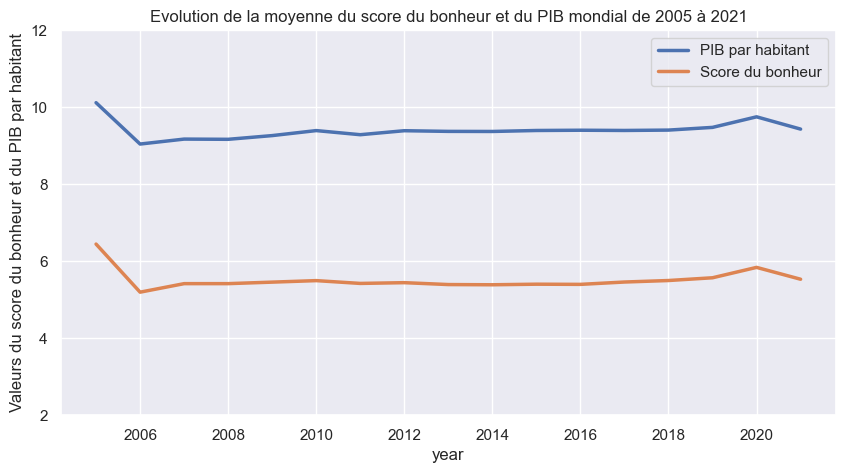

In [31]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
sns.lineplot(data=df_mean_pib_per_year, x="year", y="Log_GDP_per_capita", linewidth=2.5, label="PIB par habitant")
sns.lineplot(data=df_mean_score_per_year, x="year", y="Life_Ladder", linewidth=2.5, label="Score du bonheur")
plt.ylim(2,12)
plt.title("Evolution de la moyenne du score du bonheur et du PIB mondial de 2005 à 2021")
plt.ylabel("Valeurs du score du bonheur et du PIB par habitant")
plt.show();

#### Les deux courbes se suivent : La corrélation entre le PIB par habitants et le score du bonheur devra être confirmée à l’aide de méthodes statistiques.

## Moyenne du score par région sur l'ensemble du dataset

In [32]:
df_mean_per_region = df.groupby("Regional_indicator", as_index = False)[["Life_Ladder", "Log_GDP_per_capita"]].mean()
df_mean_per_region = df_mean_per_region.sort_values(by="Life_Ladder", ascending= False)

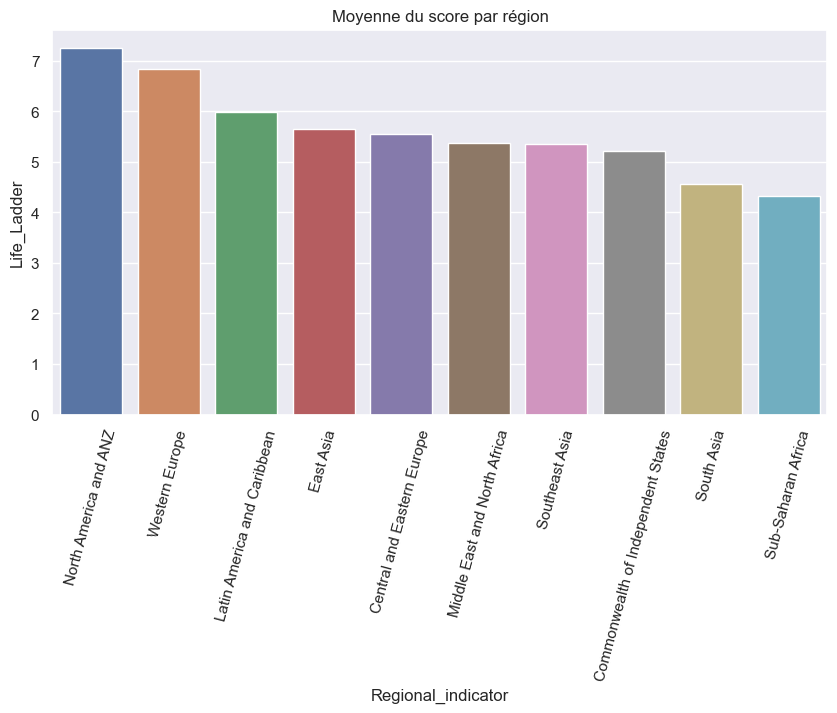

In [33]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
sns.barplot(data=df_mean_per_region, x="Regional_indicator", y="Life_Ladder")
plt.title("Moyenne du PIB par habitant par région")
plt.title("Moyenne du score par région")
plt.xticks(rotation = 75)
plt.show()

## Moyenne du PIB par habitant par région sur l'ensemble du dataset

In [34]:
df_mean_per_region_pib = df_mean_per_region.sort_values(by="Log_GDP_per_capita", ascending=False)

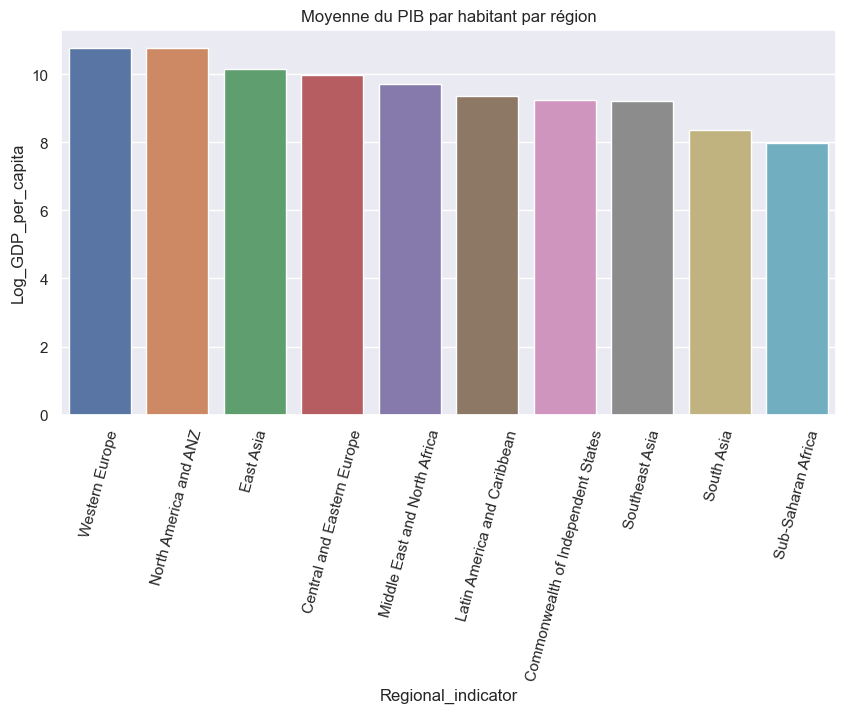

In [35]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
sns.barplot(data=df_mean_per_region_pib, x="Regional_indicator", y="Log_GDP_per_capita")
plt.title("Moyenne du PIB par habitant par région")
plt.xticks(rotation = 75)
plt.show()

In [36]:
df_mean_per_region.set_index("Regional_indicator")

,Life_Ladder,Log_GDP_per_capita
Regional_indicator,,
North America and ANZ,7.254919,10.766823
Western Europe,6.833096,10.777580
Latin America and Caribbean,5.992900,9.349141
East Asia,5.645511,10.160571
Central and Eastern Europe,5.557930,9.977241
Middle East and North Africa,5.375423,9.728855
Southeast Asia,5.345960,9.220936
Commonwealth of Independent States,5.212835,9.251269
South Asia,4.558404,8.360521


### Le classement des régions par PIB par habitant correspond au classement des régions par score du bonheur.

# Evolution de la moyenne du score par région de 2005 à 2021

In [37]:
df_mean_score_per_year_region = df.groupby(["year", "Regional_indicator"], as_index=False)["Life_Ladder"].mean()

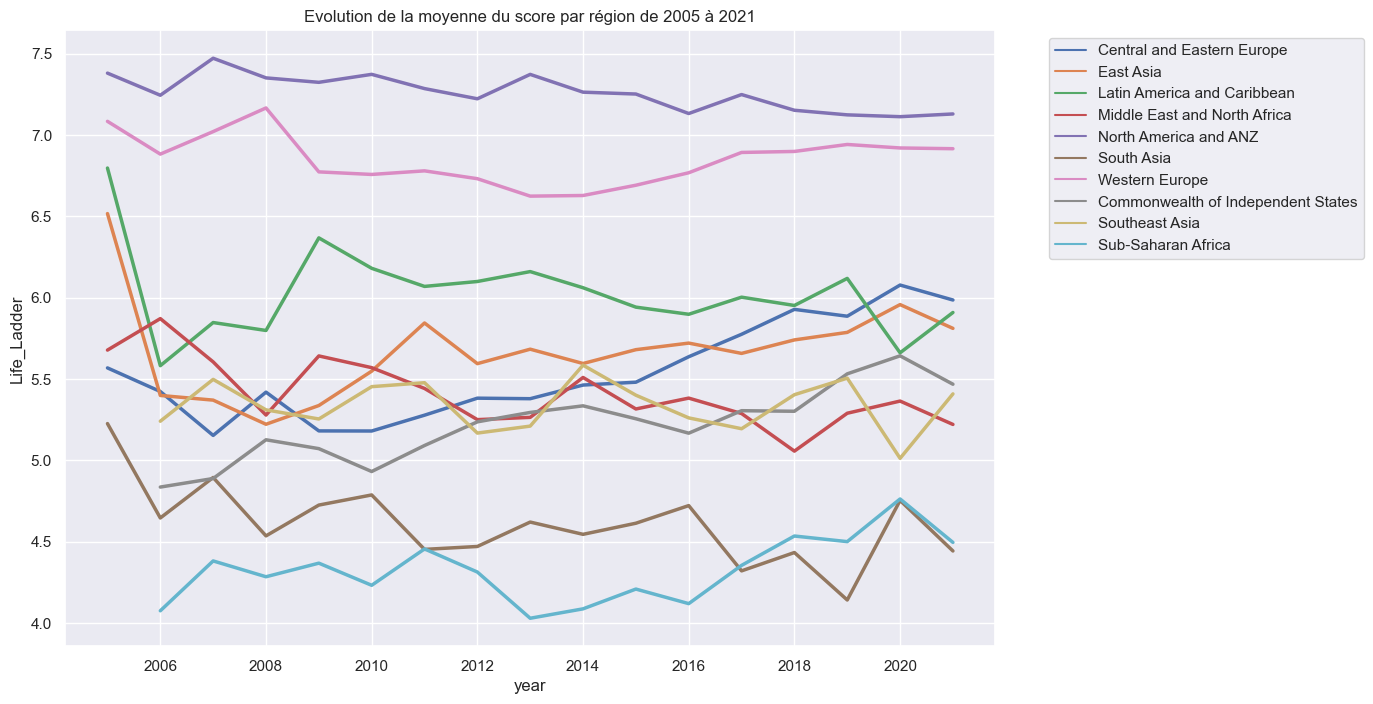

In [38]:
fig = plt.figure(figsize=(12,8))
sns.set_theme()
sns.lineplot(data=df_mean_score_per_year_region, x="year", y="Life_Ladder", hue="Regional_indicator", linewidth=2.5)
plt.title("Evolution de la moyenne du score par région de 2005 à 2021")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

## Evolution de la moyenne du score du bonheur selon le  niveau de PIB par habitants de 2005 à 2021

In [39]:
df_mean_pib_per_year_region = df.groupby(["year", "Regional_indicator"],
                                         as_index=False)[["Life_Ladder", "Log_GDP_per_capita"]].mean()

In [40]:
df_mean_pib_per_year_region["quartiles_PIB"] = pd.qcut(df_mean_pib_per_year_region["Log_GDP_per_capita"], q=4, labels=False)

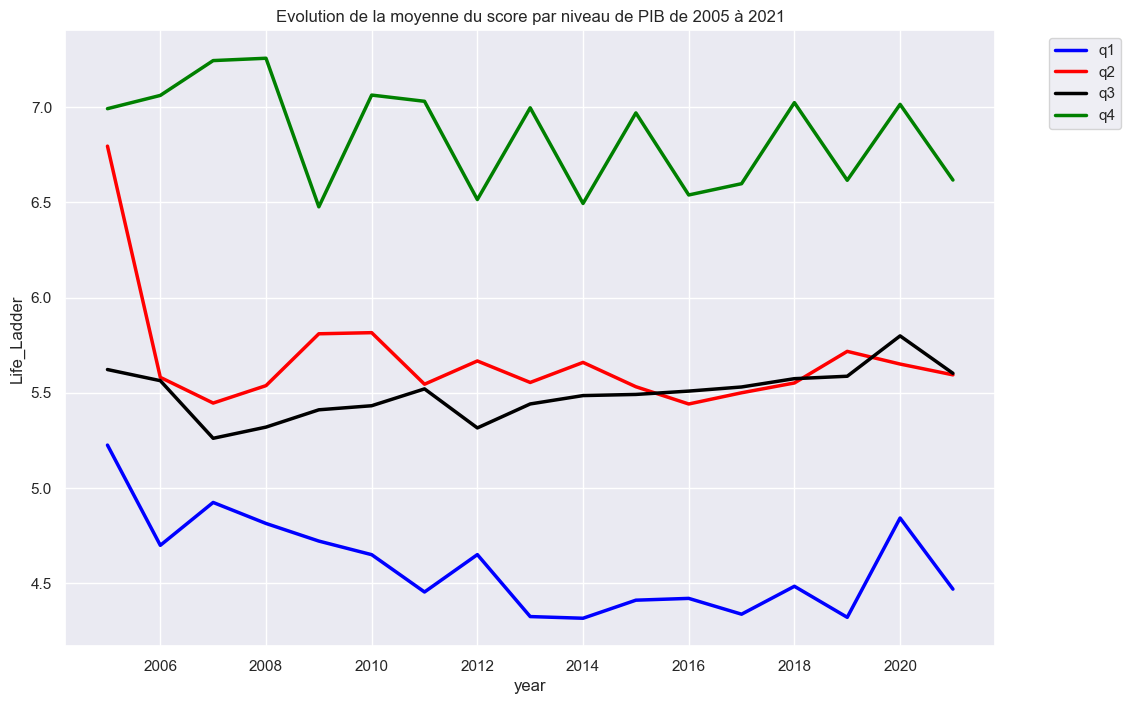

In [41]:
fig = plt.figure(figsize=(12,8))
sns.set_theme()
palette = {0: "blue", 1: "red", 2: "black", 3: "green"}
sns.lineplot(data=df_mean_pib_per_year_region, x="year", y="Life_Ladder", hue="quartiles_PIB",
             ci=None, linewidth=2.5, palette=palette)
plt.title("Evolution de la moyenne du score par niveau de PIB de 2005 à 2021")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=['q1', 'q2', 'q3', 'q4'])
plt.show();

# Nombre de pays par régions sur l'ensemble du dataset : en 2005 et après 2005

In [42]:
df_countries_2005 = df[df.year==2005] \
.groupby(["Country_name", "Regional_indicator"], as_index = False).nunique()

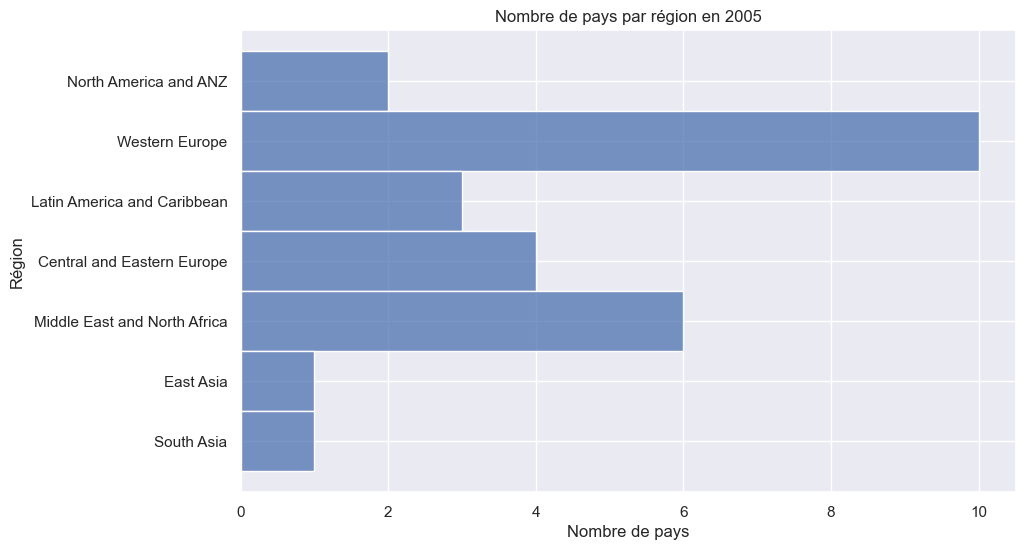

In [43]:
sns.set()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_countries_2005, y="Regional_indicator", ax=ax)

ax.set_title("Nombre de pays par région en 2005")
ax.set_ylabel("Région")
ax.set_xlabel("Nombre de pays")

plt.show()

In [44]:
df_countries_2015 = df[df.year==2015] \
.groupby(["Country_name", "Regional_indicator"], as_index = False).nunique()

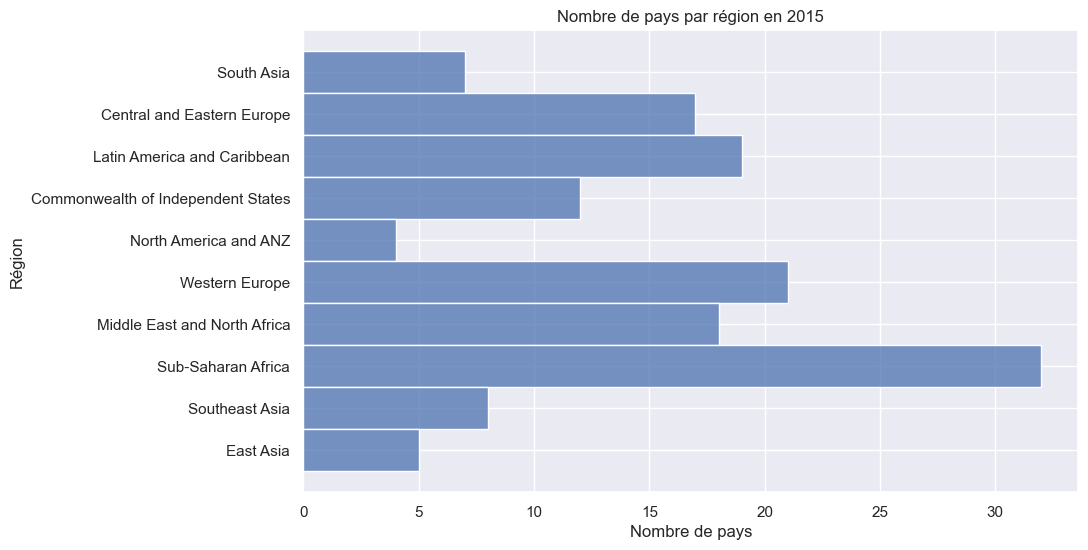

In [45]:
sns.set()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_countries_2015, y="Regional_indicator", ax=ax)

ax.set_title("Nombre de pays par région en 2015")
ax.set_ylabel("Région")
ax.set_xlabel("Nombre de pays")

plt.show()

In [46]:
df_countries_2021 = df[df.year==2021] \
.groupby(["Country_name", "Regional_indicator"], as_index = False).nunique()

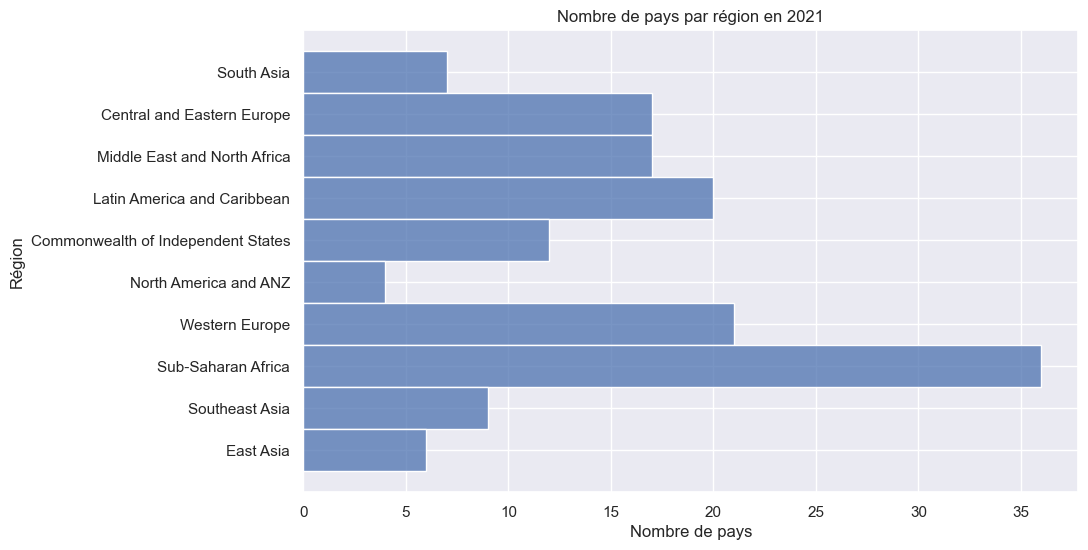

In [47]:
sns.set()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_countries_2021, y="Regional_indicator", ax=ax)

ax.set_title("Nombre de pays par région en 2021")
ax.set_ylabel("Région")
ax.set_xlabel("Nombre de pays")

plt.show()

# BOXPLOT de "Life_Ladder" par Région

In [48]:
df_mean_country = df.groupby(["Country_name", "Regional_indicator"], 
                             as_index = False)["Life_Ladder"].mean().sort_values(by="Life_Ladder", ascending=False)

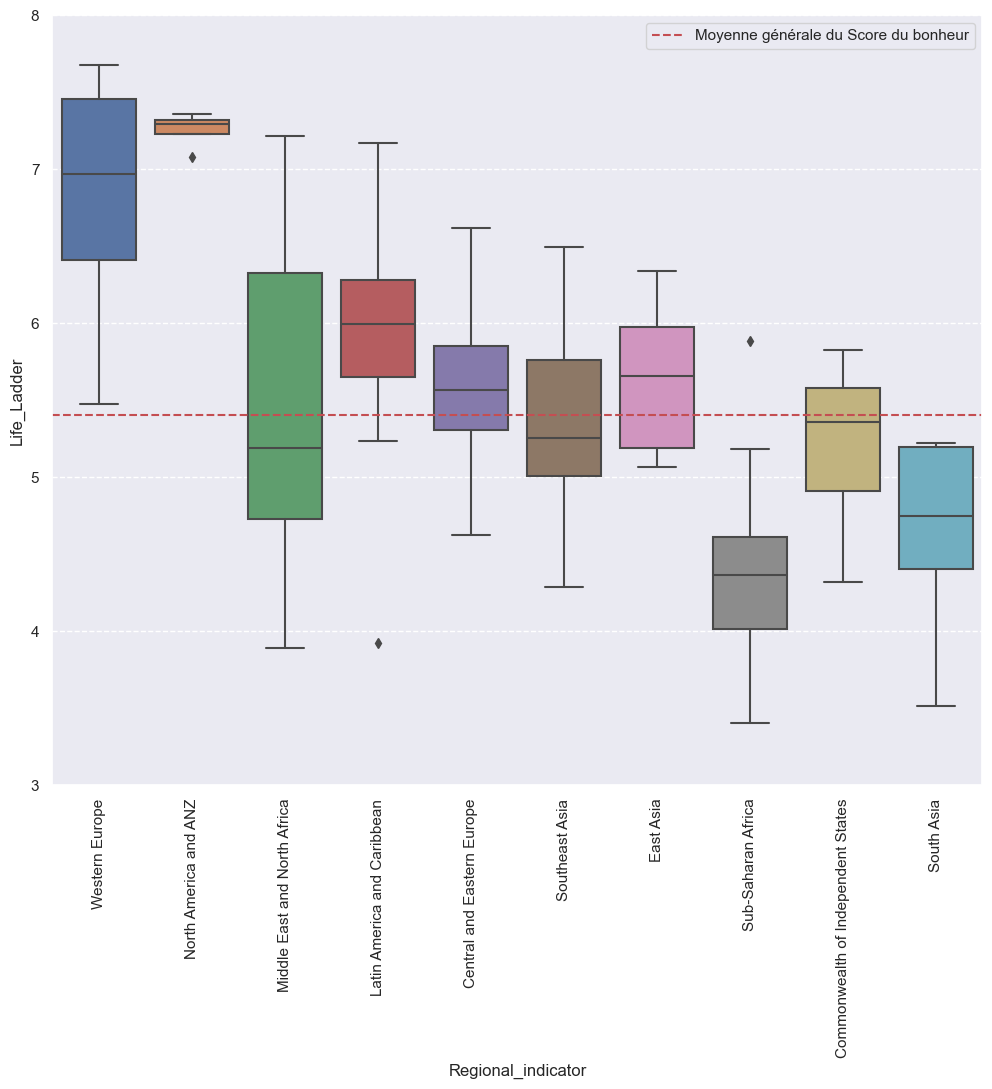

In [49]:
fig = plt.figure(figsize=(12,10))
sns.boxplot(data = df_mean_country, x = "Regional_indicator", y = "Life_Ladder")
plt.xticks(rotation=90)
plt.ylim(3, 8)
plt.grid(axis='y', linestyle='--')

mean_global = df_mean_country.Life_Ladder.mean()
plt.axhline(y=mean_global, color='r', linestyle='--', label="Moyenne générale du Score du bonheur")

plt.legend(loc="upper right")
plt.show()

# HEATMAP

<AxesSubplot:>

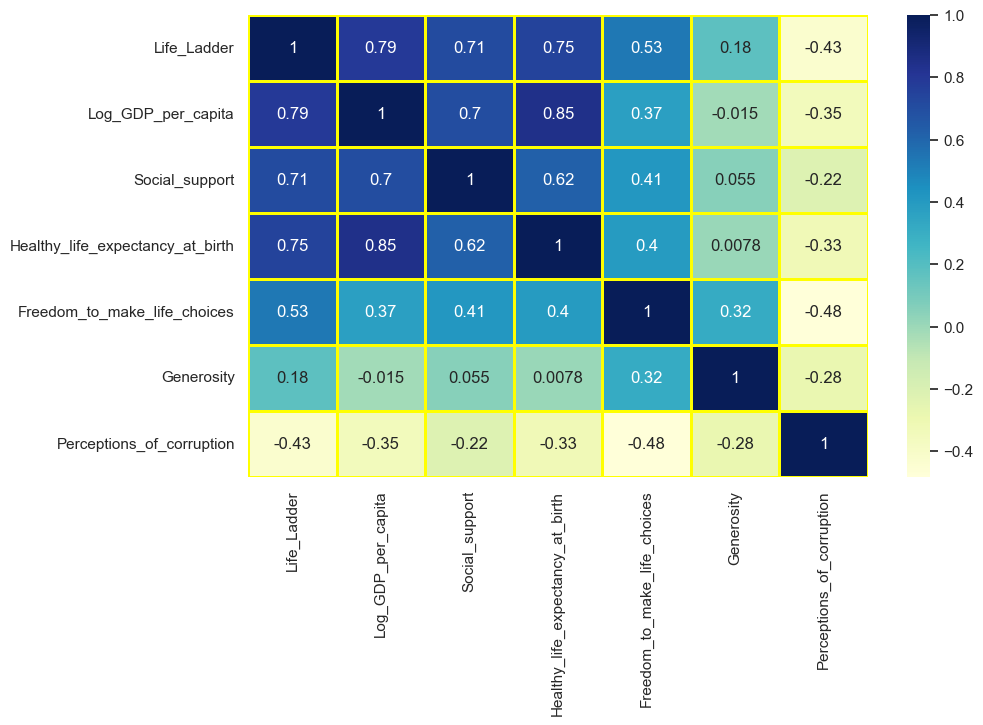

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, linewidths = 2, linecolor="Yellow", cmap="YlGnBu")

# GESTION DES VALEURS MANQUANTES

In [51]:
df.isnull().sum()

Regional_indicator                    0
Country_name                          0
year                                  0
Life_Ladder                           0
Log_GDP_per_capita                   36
Social_support                       13
Healthy_life_expectancy_at_birth     55
Freedom_to_make_life_choices         32
Generosity                           89
Perceptions_of_corruption           110
dtype: int64

## Gestion des NaNs de "Log_GDP_per_capita"

In [52]:
df.loc[df.Log_GDP_per_capita.isna()].Country_name.unique()

array(['Cuba', 'Cyprus', 'Hong Kong S.A.R. of China', 'Iran', 'Kosovo',
       'Malta', 'North Cyprus', 'Palestinian Territories', 'Somalia',
       'Somaliland region', 'South Sudan', 'Taiwan Province of China',
       'Venezuela', 'Yemen'], dtype=object)

In [53]:
df.loc[df.Country_name=="Cuba"]

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
423,Latin America and Caribbean,Cuba,2006,5.418,NaN,0.97,68.44,0.281,NaN,NaN


In [54]:
# df.loc[df.Country_name=="North Cyprus"] # Suppression de "Cuba"
df = df.drop(df[df["Country_name"] == "Cuba"].index)

In [55]:
#df.loc[df.Country_name=="North Cyprus"] # ON GARDE UNIQUEMENT LA LIGNE DE 2021
df = df.drop(df.loc[(df.Country_name=="North Cyprus") & df.Log_GDP_per_capita.isnull()].index)

In [56]:
# df.loc[df.Country_name=="Somalia"] # ON SUPPRIME TOUTES LES LIGNES DE SOMALIA
df = df.drop(df.loc[df.Country_name=="Somalia"].index)

In [57]:
# df.loc[df.Country_name=="Somaliland region"] # ON SUPPRIME TOUTES LES LIGNES DE SOMALILAND REGION
df = df.drop(df.loc[df.Country_name=="Somaliland region"].index)

In [58]:
# df.loc[df.Country_name=="South Sudan"] # ON SUPPRIME TOUTES LES LIGNES DE SOUTH SUDAN
df = df.drop(df.loc[df.Country_name=="South Sudan"].index)

In [59]:
df[df.Country_name=="Cyprus"]  # remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
424,Western Europe,Cyprus,2006,6.238,10.566,0.878,71.440,0.836,0.018,0.712
425,Western Europe,Cyprus,2009,6.833,10.558,0.812,72.160,0.775,0.054,0.801
426,Western Europe,Cyprus,2010,6.387,10.551,0.822,72.400,0.755,0.073,0.833
427,Western Europe,Cyprus,2011,6.690,10.530,0.844,72.540,0.745,0.180,0.841
428,Western Europe,Cyprus,2012,6.181,10.479,0.767,72.680,0.725,0.098,0.871
429,Western Europe,Cyprus,2013,5.439,10.414,0.744,72.820,0.656,0.102,0.867
430,Western Europe,Cyprus,2014,5.627,10.406,0.770,72.960,0.715,0.060,0.868
431,Western Europe,Cyprus,2015,5.439,10.445,0.770,73.100,0.628,0.114,0.893
432,Western Europe,Cyprus,2016,5.795,10.506,0.786,73.300,0.756,-0.030,0.898
433,Western Europe,Cyprus,2017,6.062,10.539,0.819,73.500,0.812,0.043,0.851


In [60]:
df.loc[df.Country_name=="Hong Kong S.A.R. of China"] # Remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
699,East Asia,Hong Kong S.A.R. of China,2006,5.511,10.746,0.812,NaN,0.910,0.156,0.356
700,East Asia,Hong Kong S.A.R. of China,2008,5.137,10.816,0.840,NaN,0.922,0.296,0.274
701,East Asia,Hong Kong S.A.R. of China,2009,5.397,10.788,0.835,NaN,0.918,0.308,0.272
702,East Asia,Hong Kong S.A.R. of China,2010,5.643,10.847,0.857,NaN,0.890,0.332,0.256
703,East Asia,Hong Kong S.A.R. of China,2011,5.474,10.887,0.846,NaN,0.894,0.235,0.245
704,East Asia,Hong Kong S.A.R. of China,2012,5.484,10.893,0.826,NaN,0.880,0.222,0.380
705,East Asia,Hong Kong S.A.R. of China,2014,5.458,10.940,0.834,NaN,0.843,0.224,0.423
706,East Asia,Hong Kong S.A.R. of China,2016,5.498,10.970,0.832,NaN,0.800,0.100,0.403
707,East Asia,Hong Kong S.A.R. of China,2017,5.362,11.000,0.831,NaN,0.831,0.140,0.416
708,East Asia,Hong Kong S.A.R. of China,2019,5.659,11.000,0.856,NaN,0.727,0.067,0.432


In [61]:
df.loc[df.Country_name=="Iran"] # remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
761,Middle East and North Africa,Iran,2005,5.308,9.393,0.766,62.00,0.651,NaN,0.636
762,Middle East and North Africa,Iran,2007,5.336,9.497,0.718,62.76,0.533,0.056,0.872
763,Middle East and North Africa,Iran,2008,5.129,9.489,0.633,63.14,0.601,0.052,0.868
764,Middle East and North Africa,Iran,2011,4.768,9.547,0.582,64.14,0.798,0.200,0.665
765,Middle East and North Africa,Iran,2012,4.609,9.458,0.600,64.38,0.764,NaN,0.678
766,Middle East and North Africa,Iran,2013,5.140,9.443,0.664,64.62,0.730,0.216,0.685
767,Middle East and North Africa,Iran,2014,4.682,9.476,0.644,64.86,0.767,0.241,0.640
768,Middle East and North Africa,Iran,2015,4.750,9.449,0.572,65.10,0.780,0.176,0.699
769,Middle East and North Africa,Iran,2016,4.653,9.561,0.566,65.40,0.773,0.186,0.713
770,Middle East and North Africa,Iran,2017,4.717,9.584,0.714,65.70,0.731,0.218,0.715


In [62]:
df.loc[df.Country_name=="Kosovo"] # remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
905,Central and Eastern Europe,Kosovo,2007,5.104,8.928,0.848,NaN,0.381,0.144,0.894
906,Central and Eastern Europe,Kosovo,2008,5.522,8.981,0.884,NaN,NaN,0.090,0.849
907,Central and Eastern Europe,Kosovo,2009,5.891,9.008,0.830,NaN,0.506,0.201,0.968
908,Central and Eastern Europe,Kosovo,2010,5.177,9.033,0.708,NaN,0.451,0.170,0.967
909,Central and Eastern Europe,Kosovo,2011,4.860,9.067,0.759,NaN,0.589,0.004,0.919
910,Central and Eastern Europe,Kosovo,2012,5.640,9.086,0.757,NaN,0.636,0.027,0.950
911,Central and Eastern Europe,Kosovo,2013,6.126,9.113,0.721,NaN,0.568,0.115,0.935
912,Central and Eastern Europe,Kosovo,2014,5.000,9.129,0.706,NaN,0.441,0.012,0.775
913,Central and Eastern Europe,Kosovo,2015,5.077,9.182,0.805,NaN,0.561,0.181,0.851
914,Central and Eastern Europe,Kosovo,2016,5.759,9.228,0.824,NaN,0.827,0.125,0.941


In [63]:
df.loc[df.Country_name=="Malta"] # remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1076,Western Europe,Malta,2009,6.328,10.331,0.916,71.38,0.803,0.464,NaN
1077,Western Europe,Malta,2010,5.774,10.361,0.908,71.60,0.802,0.287,NaN
1078,Western Europe,Malta,2011,6.155,10.370,0.923,71.72,0.882,0.296,NaN
1079,Western Europe,Malta,2012,5.963,10.389,0.922,71.84,0.861,0.352,NaN
1080,Western Europe,Malta,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN
1081,Western Europe,Malta,2014,6.452,10.486,0.941,72.08,0.904,0.404,0.670
1082,Western Europe,Malta,2015,6.613,10.566,0.919,72.20,0.912,0.347,0.664
1083,Western Europe,Malta,2016,6.591,10.599,0.930,72.20,0.916,0.345,0.696
1084,Western Europe,Malta,2017,6.676,10.635,0.937,72.20,0.924,0.253,0.690
1085,Western Europe,Malta,2018,6.910,10.670,0.932,72.20,0.927,0.179,0.595


In [64]:
df.loc[df.Country_name=="Palestinian Territories"] # Remplacement par moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1325,Middle East and North Africa,Palestinian Territories,2006,4.716,8.213,0.818,61.780,0.547,NaN,0.858
1326,Middle East and North Africa,Palestinian Territories,2007,4.151,8.218,0.712,61.897,0.365,-0.080,0.844
1327,Middle East and North Africa,Palestinian Territories,2008,4.386,8.276,0.666,62.015,0.358,-0.070,0.753
1328,Middle East and North Africa,Palestinian Territories,2009,4.470,8.329,0.738,62.132,0.468,-0.085,0.797
1329,Middle East and North Africa,Palestinian Territories,2010,4.703,8.383,0.822,62.250,0.504,-0.117,0.752
1330,Middle East and North Africa,Palestinian Territories,2011,4.751,8.474,0.751,NaN,0.522,-0.127,0.750
1331,Middle East and North Africa,Palestinian Territories,2012,4.647,8.531,0.782,NaN,0.542,-0.153,0.730
1332,Middle East and North Africa,Palestinian Territories,2013,4.844,8.489,0.761,NaN,0.454,-0.150,0.780
1333,Middle East and North Africa,Palestinian Territories,2014,4.722,8.457,0.775,NaN,0.657,-0.147,0.804
1334,Middle East and North Africa,Palestinian Territories,2015,4.695,8.480,0.766,NaN,0.556,-0.153,0.774


In [65]:
df.loc[df.Country_name=="Taiwan Province of China"] # On remplace par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1669,East Asia,Taiwan Province of China,2006,6.189,10.613,0.882,68.68,0.630,-0.030,0.846
1670,East Asia,Taiwan Province of China,2008,5.548,10.606,0.830,69.14,0.642,-0.017,0.785
1671,East Asia,Taiwan Province of China,2010,6.229,10.691,0.831,69.60,0.677,0.005,0.821
1672,East Asia,Taiwan Province of China,2011,6.309,10.705,0.863,NaN,0.761,0.035,0.755
1673,East Asia,Taiwan Province of China,2012,6.126,10.716,0.825,NaN,0.698,0.022,0.803
1674,East Asia,Taiwan Province of China,2013,6.340,10.750,0.817,NaN,0.690,0.002,0.841
1675,East Asia,Taiwan Province of China,2014,6.363,10.798,0.870,NaN,0.693,0.092,0.866
1676,East Asia,Taiwan Province of China,2015,6.450,10.842,0.885,NaN,0.701,0.019,0.857
1677,East Asia,Taiwan Province of China,2016,6.513,10.855,0.895,NaN,0.719,-0.049,0.811
1678,East Asia,Taiwan Province of China,2017,6.359,10.871,0.891,NaN,0.760,-0.070,0.743


In [66]:
df.loc[df.Country_name=="Venezuela"] # on remplace par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1879,Latin America and Caribbean,Venezuela,2005,7.170,9.313,0.955,65.40,0.838,NaN,0.720
1880,Latin America and Caribbean,Venezuela,2006,6.525,9.460,0.946,65.46,0.798,-0.031,0.646
1881,Latin America and Caribbean,Venezuela,2008,6.258,9.701,0.922,65.58,0.678,-0.225,0.776
1882,Latin America and Caribbean,Venezuela,2009,7.189,9.542,0.945,65.64,0.677,-0.116,0.828
1883,Latin America and Caribbean,Venezuela,2010,7.478,9.717,0.932,65.70,0.768,-0.155,0.754
1884,Latin America and Caribbean,Venezuela,2011,6.580,9.822,0.931,65.74,0.766,-0.226,0.772
1885,Latin America and Caribbean,Venezuela,2012,7.067,9.826,0.932,65.78,0.804,-0.193,0.743
1886,Latin America and Caribbean,Venezuela,2013,6.553,9.739,0.896,65.82,0.642,-0.220,0.837
1887,Latin America and Caribbean,Venezuela,2014,6.136,9.557,0.904,65.86,0.570,-0.199,0.827
1888,Latin America and Caribbean,Venezuela,2015,5.569,9.001,0.911,65.90,0.512,-0.117,0.813


In [67]:
df.loc[df.Country_name=="Yemen"] # On remplace par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1908,Middle East and North Africa,Yemen,2007,4.477,8.214,0.825,53.400,0.673,0.011,NaN
1909,Middle East and North Africa,Yemen,2009,4.809,8.278,0.756,54.000,0.644,-0.052,0.832
1910,Middle East and North Africa,Yemen,2010,4.350,8.453,0.727,54.300,0.659,-0.104,0.853
1911,Middle East and North Africa,Yemen,2011,3.746,8.336,0.663,54.300,0.638,-0.173,0.754
1912,Middle East and North Africa,Yemen,2012,4.061,8.236,0.682,54.300,0.706,-0.171,0.793
1913,Middle East and North Africa,Yemen,2013,4.218,8.242,0.694,54.300,0.543,-0.179,0.885
1914,Middle East and North Africa,Yemen,2014,3.968,8.117,0.638,54.300,0.664,-0.157,0.885
1915,Middle East and North Africa,Yemen,2015,2.983,7.858,0.669,54.300,0.610,-0.139,0.829
1916,Middle East and North Africa,Yemen,2016,3.826,7.715,0.775,55.100,0.533,-0.151,NaN
1917,Middle East and North Africa,Yemen,2017,3.254,7.578,0.790,55.900,0.595,-0.147,NaN


### Remplacement NaNs de "Log_GDP_per_capita" par la moyenne du pays

In [68]:
# moyenne de "Log_GDP_per_capita" du pays correspondant
mean_by_country = df.groupby("Country_name")["Log_GDP_per_capita"].mean()

# Remplacement des valeurs manquantes par la moyenne du "Log_GDP_per_capita" du pays correspondant
for country in mean_by_country.index:
    mask = (df["Country_name"] == country) & (df["Log_GDP_per_capita"].isnull())
    df.loc[mask, "Log_GDP_per_capita"] = mean_by_country[country]

In [69]:
df.Log_GDP_per_capita.isna().sum()

0

## Gestion des NaNs de "Social_support"

In [70]:
df.loc[df.Social_support.isna()].Country_name.unique()

array(['Algeria', 'Bahrain', 'Canada', 'Djibouti', 'Kuwait', 'Morocco',
       'Oman', 'Qatar', 'Tunisia', 'United Arab Emirates',
       'United States', 'Vietnam'], dtype=object)

In [71]:
# df.loc[df.Country_name=="Oman"] # SUPPRESSION DE OMAN
df = df.drop(df.loc[df.Country_name=="Oman"].index)

In [72]:
df.loc[df.Country_name=="Algeria"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
25,Middle East and North Africa,Algeria,2010,5.464,9.287,NaN,64.500,0.593,-0.205,0.618
26,Middle East and North Africa,Algeria,2011,5.317,9.297,0.810,64.660,0.530,-0.181,0.638
27,Middle East and North Africa,Algeria,2012,5.605,9.311,0.839,64.820,0.587,-0.172,0.690
28,Middle East and North Africa,Algeria,2014,6.355,9.335,0.818,65.140,NaN,NaN,NaN
29,Middle East and North Africa,Algeria,2016,5.341,9.362,0.749,65.500,NaN,NaN,NaN
30,Middle East and North Africa,Algeria,2017,5.249,9.354,0.807,65.700,0.437,-0.167,0.700
31,Middle East and North Africa,Algeria,2018,5.043,9.348,0.799,65.900,0.583,-0.146,0.759
32,Middle East and North Africa,Algeria,2019,4.745,9.337,0.803,66.100,0.385,0.005,0.741
2057,Middle East and North Africa,Algeria,2021,4.887,9.342,0.802,66.005,0.480,-0.067,0.752


In [73]:
df.loc[df.Country_name=="Bahrain"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
107,Middle East and North Africa,Bahrain,2009,5.701,10.709,0.904,65.940,0.896,0.037,0.506
108,Middle East and North Africa,Bahrain,2010,5.937,10.706,0.877,66.300,0.862,-0.001,0.715
109,Middle East and North Africa,Bahrain,2011,4.824,10.696,0.908,66.580,0.870,-0.051,0.583
110,Middle East and North Africa,Bahrain,2012,5.027,10.716,0.911,66.860,0.682,NaN,0.438
111,Middle East and North Africa,Bahrain,2013,6.690,10.757,0.884,67.140,0.809,NaN,0.525
112,Middle East and North Africa,Bahrain,2014,6.165,10.783,NaN,67.420,NaN,NaN,NaN
113,Middle East and North Africa,Bahrain,2015,6.007,10.785,0.853,67.700,0.850,0.112,NaN
114,Middle East and North Africa,Bahrain,2016,6.170,10.781,0.863,68.100,0.889,0.088,NaN
115,Middle East and North Africa,Bahrain,2017,6.227,10.771,0.876,68.500,0.906,0.136,NaN
116,Middle East and North Africa,Bahrain,2019,7.098,10.715,0.878,69.300,0.907,0.048,NaN


In [74]:
df.loc[df.Country_name=="Canada"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
293,North America and ANZ,Canada,2005,7.418,10.652,0.962,71.30,0.957,0.256,0.503
294,North America and ANZ,Canada,2007,7.482,10.739,NaN,71.66,0.930,0.249,0.406
295,North America and ANZ,Canada,2008,7.486,10.738,0.939,71.84,0.926,0.262,0.370
296,North America and ANZ,Canada,2009,7.488,10.697,0.943,72.02,0.915,0.246,0.413
297,North America and ANZ,Canada,2010,7.650,10.717,0.954,72.20,0.934,0.230,0.413
298,North America and ANZ,Canada,2011,7.426,10.738,0.922,72.36,0.951,0.253,0.433
299,North America and ANZ,Canada,2012,7.415,10.744,0.948,72.52,0.918,0.290,0.466
300,North America and ANZ,Canada,2013,7.594,10.757,0.936,72.68,0.916,0.316,0.406
301,North America and ANZ,Canada,2014,7.304,10.775,0.918,72.84,0.939,0.270,0.442
302,North America and ANZ,Canada,2015,7.413,10.774,0.939,73.00,0.931,0.253,0.427


In [75]:
df.loc[df.Country_name=="Djibouti"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
464,Sub-Saharan Africa,Djibouti,2008,5.009,8.111,0.690,53.26,0.773,0.129,0.576
465,Sub-Saharan Africa,Djibouti,2009,4.906,7.927,0.901,53.78,0.649,0.005,0.634
466,Sub-Saharan Africa,Djibouti,2010,5.006,7.812,NaN,54.30,0.764,-0.058,0.597
467,Sub-Saharan Africa,Djibouti,2011,4.369,7.880,0.633,54.70,0.746,-0.057,0.519


In [76]:
df.loc[df.Country_name=="Kuwait"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
919,Middle East and North Africa,Kuwait,2006,6.076,11.228,0.919,63.96,0.769,-0.236,0.328
920,Middle East and North Africa,Kuwait,2009,6.585,11.065,0.926,64.44,0.819,0.007,0.675
921,Middle East and North Africa,Kuwait,2010,6.798,10.982,0.893,64.60,0.703,-0.031,0.486
922,Middle East and North Africa,Kuwait,2011,6.378,11.017,0.882,64.90,0.769,NaN,0.560
923,Middle East and North Africa,Kuwait,2012,6.221,11.025,0.889,65.20,0.934,NaN,NaN
924,Middle East and North Africa,Kuwait,2013,6.480,10.985,0.862,65.50,0.751,NaN,NaN
925,Middle East and North Africa,Kuwait,2014,6.180,10.945,NaN,65.80,NaN,NaN,NaN
926,Middle East and North Africa,Kuwait,2015,6.146,10.912,0.823,66.10,0.822,0.082,NaN
927,Middle East and North Africa,Kuwait,2016,5.947,10.910,0.845,66.30,0.841,-0.075,NaN
928,Middle East and North Africa,Kuwait,2017,6.094,10.837,0.853,66.50,0.884,-0.005,NaN


In [77]:
df.loc[df.Country_name=="Morocco"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1164,Middle East and North Africa,Morocco,2010,4.383,8.746,NaN,63.500,0.663,-0.162,0.900
1165,Middle East and North Africa,Morocco,2011,5.085,8.783,0.833,63.800,0.579,-0.218,0.875
1166,Middle East and North Africa,Morocco,2012,4.970,8.799,0.676,64.100,0.757,-0.187,0.845
1167,Middle East and North Africa,Morocco,2013,5.142,8.829,0.597,64.400,0.572,-0.210,0.771
1168,Middle East and North Africa,Morocco,2015,5.163,8.872,0.606,65.000,0.713,-0.228,0.842
1169,Middle East and North Africa,Morocco,2016,5.386,8.869,0.655,65.300,0.817,-0.237,0.717
1170,Middle East and North Africa,Morocco,2017,5.312,8.898,0.641,65.600,0.814,-0.216,0.841
1171,Middle East and North Africa,Morocco,2018,4.897,8.914,0.554,65.900,0.773,-0.234,0.843
1172,Middle East and North Africa,Morocco,2019,5.057,8.925,0.535,66.200,0.757,-0.244,0.757
1173,Middle East and North Africa,Morocco,2020,4.803,8.871,0.553,66.500,0.819,-0.229,0.803


In [78]:
df.loc[df.Country_name=="Qatar"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1422,Middle East and North Africa,Qatar,2009,6.418,11.456,0.894,66.58,0.865,0.235,0.184
1423,Middle East and North Africa,Qatar,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN
1424,Middle East and North Africa,Qatar,2011,6.592,11.553,0.857,67.02,0.905,0.012,NaN
1425,Middle East and North Africa,Qatar,2012,6.611,11.523,0.838,67.34,0.924,0.162,NaN
1426,Middle East and North Africa,Qatar,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN


In [79]:
df.loc[df.Country_name=="Tunisia"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1741,Middle East and North Africa,Tunisia,2009,5.025,9.197,NaN,64.960,0.781,-0.119,0.722
1742,Middle East and North Africa,Tunisia,2010,5.131,9.222,0.863,65.100,0.624,-0.135,0.732
1743,Middle East and North Africa,Tunisia,2011,4.876,9.192,0.715,65.280,0.603,-0.199,0.913
1744,Middle East and North Africa,Tunisia,2012,4.464,9.222,0.614,65.460,0.568,-0.176,0.899
1745,Middle East and North Africa,Tunisia,2013,5.246,9.240,0.648,65.640,0.536,-0.207,0.886
1746,Middle East and North Africa,Tunisia,2014,4.764,9.260,0.680,65.820,0.589,-0.232,0.783
1747,Middle East and North Africa,Tunisia,2015,5.132,9.261,0.609,66.000,0.711,-0.226,0.815
1748,Middle East and North Africa,Tunisia,2016,4.521,9.262,0.702,66.300,0.614,-0.165,0.811
1749,Middle East and North Africa,Tunisia,2017,4.124,9.269,0.717,66.600,0.478,-0.219,0.869
1750,Middle East and North Africa,Tunisia,2018,4.741,9.284,0.733,66.900,0.650,-0.191,0.840


In [80]:
df.loc[df.Country_name=="United Arab Emirates"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1808,Middle East and North Africa,United Arab Emirates,2006,6.734,11.367,0.903,65.920,0.898,-0.033,0.203
1809,Middle East and North Africa,United Arab Emirates,2009,6.866,10.975,0.885,66.280,0.849,0.019,0.339
1810,Middle East and North Africa,United Arab Emirates,2010,7.097,10.914,0.912,66.400,0.878,0.057,0.355
1811,Middle East and North Africa,United Arab Emirates,2011,7.119,10.935,0.881,66.420,0.889,0.071,NaN
1812,Middle East and North Africa,United Arab Emirates,2012,7.218,10.958,0.856,66.440,0.920,NaN,NaN
1813,Middle East and North Africa,United Arab Emirates,2013,6.621,11.001,0.864,66.460,0.936,NaN,NaN
1814,Middle East and North Africa,United Arab Emirates,2014,6.540,11.041,NaN,66.480,NaN,NaN,NaN
1815,Middle East and North Africa,United Arab Emirates,2015,6.568,11.086,0.824,66.500,0.915,0.201,NaN
1816,Middle East and North Africa,United Arab Emirates,2016,6.831,11.105,0.849,66.700,0.949,0.131,NaN
1817,Middle East and North Africa,United Arab Emirates,2017,7.039,11.115,0.836,66.900,0.962,0.216,NaN


In [81]:
df.loc[df.Country_name=="United States"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1836,North America and ANZ,United States,2006,7.182,10.924,0.965,68.06,0.911,NaN,0.600
1837,North America and ANZ,United States,2007,7.513,10.933,NaN,68.22,0.872,0.197,0.633
1838,North America and ANZ,United States,2008,7.280,10.922,0.953,68.38,0.878,0.255,0.668
1839,North America and ANZ,United States,2009,7.158,10.888,0.912,68.54,0.831,0.201,0.665
1840,North America and ANZ,United States,2010,7.164,10.905,0.926,68.70,0.828,0.244,0.690
1841,North America and ANZ,United States,2011,7.115,10.913,0.922,68.68,0.863,0.161,0.697
1842,North America and ANZ,United States,2012,7.026,10.928,0.903,68.66,0.823,0.215,0.710
1843,North America and ANZ,United States,2013,7.249,10.939,0.925,68.64,0.792,0.274,0.747
1844,North America and ANZ,United States,2014,7.151,10.956,0.902,68.62,0.866,0.221,0.702
1845,North America and ANZ,United States,2015,6.864,10.977,0.904,68.60,0.849,0.219,0.698


In [82]:
df.loc[df.Country_name=="Vietnam"] # Remplacement par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1894,Southeast Asia,Vietnam,2006,5.294,8.335,0.888,65.860,0.886,0.015,NaN
1895,Southeast Asia,Vietnam,2007,5.422,8.394,0.856,66.020,0.918,0.089,0.754
1896,Southeast Asia,Vietnam,2008,5.480,8.440,0.805,66.180,0.889,0.201,0.789
1897,Southeast Asia,Vietnam,2009,5.304,8.483,0.815,66.340,0.834,-0.062,0.838
1898,Southeast Asia,Vietnam,2010,5.296,8.535,0.787,66.500,0.831,-0.006,0.743
1899,Southeast Asia,Vietnam,2011,5.767,8.585,0.898,66.660,0.818,0.105,0.742
1900,Southeast Asia,Vietnam,2012,5.535,8.626,0.775,66.820,0.856,-0.110,0.815
1901,Southeast Asia,Vietnam,2013,5.023,8.668,0.759,66.980,0.920,-0.027,0.771
1902,Southeast Asia,Vietnam,2014,5.085,8.716,0.792,67.140,NaN,0.000,NaN
1903,Southeast Asia,Vietnam,2015,5.076,8.770,0.849,67.300,NaN,0.086,NaN


### Remplacement NaNs de "Social_support" par la moyenne du pays

In [83]:
# moyenne de "Social_support" du pays correspondant
mean_social_support_by_country = df.groupby("Country_name")["Social_support"].mean()

# Remplacement des valeurs manquantes par la moyenne du "Social_support" du pays correspondant
for country in mean_social_support_by_country.index:
    mask = (df["Country_name"] == country) & (df["Social_support"].isnull())
    df.loc[mask, "Social_support"] = mean_social_support_by_country[country]

In [84]:
df.Social_support.isna().sum()

0

## Gestion des NaNs de "Healthy_life_expectancy_at_birth"

In [85]:
df.loc[df.Healthy_life_expectancy_at_birth.isna()].Country_name.unique()

array(['Hong Kong S.A.R. of China', 'Kosovo', 'Palestinian Territories',
       'Taiwan Province of China'], dtype=object)

In [86]:
# df.loc[df.Country_name=="Hong Kong S.A.R. of China"] # ON GARDE UNIQUMENT LA LIGNE ANNEE 2021
df = df.drop(df.loc[(df.Country_name=="Hong Kong S.A.R. of China") & df.Healthy_life_expectancy_at_birth.isnull()].index)

In [87]:
# df.loc[df.Country_name=="Kosovo"] # ON GARDE UNIQUMENT LA LIGNE ANNEE 2021
df = df.drop(df.loc[(df.Country_name=="Kosovo") & df.Healthy_life_expectancy_at_birth.isnull()].index)

In [88]:
df.loc[df.Country_name=="Palestinian Territories"] # On remplace par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1325,Middle East and North Africa,Palestinian Territories,2006,4.716,8.213000,0.818,61.780,0.547,NaN,0.858
1326,Middle East and North Africa,Palestinian Territories,2007,4.151,8.218000,0.712,61.897,0.365,-0.080,0.844
1327,Middle East and North Africa,Palestinian Territories,2008,4.386,8.276000,0.666,62.015,0.358,-0.070,0.753
1328,Middle East and North Africa,Palestinian Territories,2009,4.470,8.329000,0.738,62.132,0.468,-0.085,0.797
1329,Middle East and North Africa,Palestinian Territories,2010,4.703,8.383000,0.822,62.250,0.504,-0.117,0.752
1330,Middle East and North Africa,Palestinian Territories,2011,4.751,8.474000,0.751,NaN,0.522,-0.127,0.750
1331,Middle East and North Africa,Palestinian Territories,2012,4.647,8.531000,0.782,NaN,0.542,-0.153,0.730
1332,Middle East and North Africa,Palestinian Territories,2013,4.844,8.489000,0.761,NaN,0.454,-0.150,0.780
1333,Middle East and North Africa,Palestinian Territories,2014,4.722,8.457000,0.775,NaN,0.657,-0.147,0.804
1334,Middle East and North Africa,Palestinian Territories,2015,4.695,8.480000,0.766,NaN,0.556,-0.153,0.774


In [89]:
df.loc[df.Country_name=="Taiwan Province of China"] # On remplace par la moyenne

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
1669,East Asia,Taiwan Province of China,2006,6.189,10.613000,0.882,68.68,0.630,-0.030,0.846
1670,East Asia,Taiwan Province of China,2008,5.548,10.606000,0.830,69.14,0.642,-0.017,0.785
1671,East Asia,Taiwan Province of China,2010,6.229,10.691000,0.831,69.60,0.677,0.005,0.821
1672,East Asia,Taiwan Province of China,2011,6.309,10.705000,0.863,NaN,0.761,0.035,0.755
1673,East Asia,Taiwan Province of China,2012,6.126,10.716000,0.825,NaN,0.698,0.022,0.803
1674,East Asia,Taiwan Province of China,2013,6.340,10.750000,0.817,NaN,0.690,0.002,0.841
1675,East Asia,Taiwan Province of China,2014,6.363,10.798000,0.870,NaN,0.693,0.092,0.866
1676,East Asia,Taiwan Province of China,2015,6.450,10.842000,0.885,NaN,0.701,0.019,0.857
1677,East Asia,Taiwan Province of China,2016,6.513,10.855000,0.895,NaN,0.719,-0.049,0.811
1678,East Asia,Taiwan Province of China,2017,6.359,10.871000,0.891,NaN,0.760,-0.070,0.743


### Remplacement NaNs de "Healthy_life_expectancy_at_birth" par la moyenne du pays

In [90]:
# moyenne de "Healthy_life_expectancy_at_birth" du pays correspondant
mean_healthy_by_country = df.groupby("Country_name")["Healthy_life_expectancy_at_birth"].mean()

# Remplacement des valeurs manquantes par la moyenne du "Healthy_life_expectancy_at_birth" du pays correspondant
for country in mean_healthy_by_country.index:
    mask = (df["Country_name"] == country) & (df["Healthy_life_expectancy_at_birth"].isnull())
    df.loc[mask, "Healthy_life_expectancy_at_birth"] = mean_healthy_by_country[country]

In [91]:
df.Healthy_life_expectancy_at_birth.isna().sum()

0

## Gestion des NaNs de "Freedom_to_make_life_choices"

In [92]:
df.loc[df.Freedom_to_make_life_choices.isna()].Country_name.unique()

array(['Algeria', 'Bahrain', 'Cambodia', 'China', 'Egypt', 'Iraq',
       'Jordan', 'Kuwait', 'Laos', 'Madagascar', 'Myanmar', 'Qatar',
       'Saudi Arabia', 'Tajikistan', 'Turkmenistan',
       'United Arab Emirates', 'Uzbekistan', 'Vietnam'], dtype=object)

In [93]:
# df.loc[df.Country_name=="China"] # ON GARDE UNIQUEMENT L'ANNEE 2021 CAR QUE DES NAN sur les autres années pour la corruption
df = df.drop(df.loc[(df.Country_name=="China") & df.Perceptions_of_corruption.isnull()].index)

In [94]:
# df.loc[df.Country_name=="Turkmenistan"] # ON GARDE UNIQUEMENT L'ANNEE 2021 car que des NaN les autres années pour corruption
df = df.drop(df.loc[(df.Country_name=="Turkmenistan") & df.Perceptions_of_corruption.isnull()].index)

In [95]:
# df.loc[df.Country_name=="Qatar"] # ON GARDE QUE L'ANNEE 2009 donc uniquement où pas de NaNs dans corruption
df = df.drop(df.loc[(df.Country_name=="Qatar") & df.Perceptions_of_corruption.isnull()].index)

In [96]:
# df.loc[df.Country_name=="Algeria"] # On remplace par la moyenne

In [97]:
# df.loc[df.Country_name=="Bahrain"] # On remplace par la moyenne

In [98]:
# df.loc[df.Country_name=="Cambodia"] # On remplace par la moyenne

In [99]:
# df.loc[df.Country_name=="Egypt"] # On remplace par la moyenne

In [100]:
# df.loc[df.Country_name=="Iraq"] # On remplace par la moyenne

In [101]:
# df.loc[df.Country_name=="Jordan"] # On remplace par la moyenne

In [102]:
# df.loc[df.Country_name=="Kuwait"] # On remplace par la moyenne

In [103]:
# df.loc[df.Country_name=="Laos"] # On remplace par la moyenne

In [104]:
# df.loc[df.Country_name=="Madagascar"] # On remplace par la moyenne

In [105]:
# df.loc[df.Country_name=="Myanmar"] # On remplace par la moyenne

In [106]:
# df.loc[df.Country_name=="Saudi Arabia"] # On remplace par la moyenne

In [107]:
# df.loc[df.Country_name=="Tajikistan"] # On remplace par la moyenne

In [108]:
# df.loc[df.Country_name=="United Arab Emirates"] # On remplace par la moyenne

In [109]:
# df.loc[df.Country_name=="Uzbekistan"] # On remplace par la moyenne

In [110]:
# df.loc[df.Country_name=="Vietnam"] # On remplace par la moyenne

### Remplacement NaNs de "Freedom_to_make_life_choices" par la moyenne du pays

In [111]:
# moyenne de "Freedom_to_make_life_choices" du pays correspondant
mean_freedom_by_country = df.groupby("Country_name")["Freedom_to_make_life_choices"].mean()

# Remplacement des valeurs manquantes par la moyenne du "Freedom_to_make_life_choices" du pays correspondant
for country in mean_freedom_by_country.index:
    mask = (df["Country_name"] == country) & (df["Freedom_to_make_life_choices"].isnull())
    df.loc[mask, "Freedom_to_make_life_choices"] = mean_freedom_by_country[country]

In [112]:
df.Freedom_to_make_life_choices.isna().sum()

0

## Gestion des NaNs de "Generosity"

In [113]:
df.loc[df.Generosity.isna()].Country_name.unique()

array(['Algeria', 'Australia', 'Bahrain', 'Belgium', 'Brazil', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Iran', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Malta', 'Mexico', 'Nepal',
       'Netherlands', 'Pakistan', 'Palestinian Territories', 'Poland',
       'Romania', 'Rwanda', 'Saudi Arabia', 'South Korea', 'Spain',
       'Sweden', 'Taiwan Province of China', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Venezuela', 'Vietnam', 'Yemen'], dtype=object)

In [114]:
df["Generosity"] = df.groupby("Country_name")["Generosity"].transform(lambda x : x.fillna(x.mean()))

In [115]:
df.isna().sum()

Regional_indicator                   0
Country_name                         0
year                                 0
Life_Ladder                          0
Log_GDP_per_capita                   0
Social_support                       0
Healthy_life_expectancy_at_birth     0
Freedom_to_make_life_choices         0
Generosity                           0
Perceptions_of_corruption           79
dtype: int64

## Gestion des NaNs de "Perceptions_of_corruption"

In [116]:
df.loc[df.Perceptions_of_corruption.isna()].Country_name.unique()

array(['Algeria', 'Bahrain', 'Cambodia', 'Congo (Brazzaville)', 'Egypt',
       'Ethiopia', 'Jordan', 'Kuwait', 'Laos', 'Libya', 'Madagascar',
       'Maldives', 'Malta', 'Saudi Arabia', 'Singapore', 'South Africa',
       'Sweden', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
      dtype=object)

In [117]:
df["Perceptions_of_corruption"] = df.groupby("Country_name")["Perceptions_of_corruption"].transform(lambda x : x.fillna(x.mean()))

In [118]:
df.isna().sum()

Regional_indicator                  0
Country_name                        0
year                                0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Regional_indicator                2024 non-null   object 
 1   Country_name                      2024 non-null   object 
 2   year                              2024 non-null   int64  
 3   Life_Ladder                       2024 non-null   float64
 4   Log_GDP_per_capita                2024 non-null   float64
 5   Social_support                    2024 non-null   float64
 6   Healthy_life_expectancy_at_birth  2024 non-null   float64
 7   Freedom_to_make_life_choices      2024 non-null   float64
 8   Generosity                        2024 non-null   float64
 9   Perceptions_of_corruption         2024 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 173.9+ KB


# Analyses statistiques

In [120]:
import scipy.stats as stats

# Supposons que vous ayez vos données dans les variables x et y
# x représente la variable explicative et y représente la variable cible

# Calcul de la corrélation de Pearson
correlation, _ = stats.pearsonr(df.Log_GDP_per_capita, df.Life_Ladder)

# Calcul de la p-value
p_value = stats.pearsonr(df.Log_GDP_per_capita, df.Life_Ladder)[1]

# Affichage des résultats
print("Corrélation de Pearson : ", correlation)
print("P-value : ", p_value)

Corrélation de Pearson :  0.7950042114259807
P-value :  0.0


In [121]:
df.columns_stats = [
        #'Regional_indicator', 'Country_name', 'year',
        'Life_Ladder',
       'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption']

In [122]:
import scipy.stats as stats


# Liste pour stocker les résultats
correlation_results = []

# Boucle pour itérer sur les variables explicatives
for var in df.columns_stats:
    if var != 'Life_Ladder':
        # Calcul de la corrélation de Pearson
        correlation, _ = stats.pearsonr(df[var], df['Life_Ladder'])
        
        # Calcul de la p-value
        p_value = stats.pearsonr(df[var], df['Life_Ladder'])[1]
        
        # Stockage des résultats dans une liste
        correlation_results.append((var, correlation, p_value))

# Affichage des résultats
for result in correlation_results:
    print("Variable explicative : ", result[0])
    print("Corrélation de Pearson : ", result[1])
    print("P-value : ", result[2])
    print("\n")


Variable explicative :  Log_GDP_per_capita
Corrélation de Pearson :  0.7950042114259807
P-value :  0.0


Variable explicative :  Social_support
Corrélation de Pearson :  0.7145383539876242
P-value :  4.7465691e-316


Variable explicative :  Healthy_life_expectancy_at_birth
Corrélation de Pearson :  0.7503498544045164
P-value :  0.0


Variable explicative :  Freedom_to_make_life_choices
Corrélation de Pearson :  0.5312107506137111
P-value :  8.952343695564951e-148


Variable explicative :  Generosity
Corrélation de Pearson :  0.17686409470812284
P-value :  1.0989636108273123e-15


Variable explicative :  Perceptions_of_corruption
Corrélation de Pearson :  -0.45418575645922193
P-value :  1.419070944385589e-103




# VISUALISATION DES CORRELATIONS ENTRE LES VARIABLES EXPLICATIVES ET LA VARIABLE CIBLE

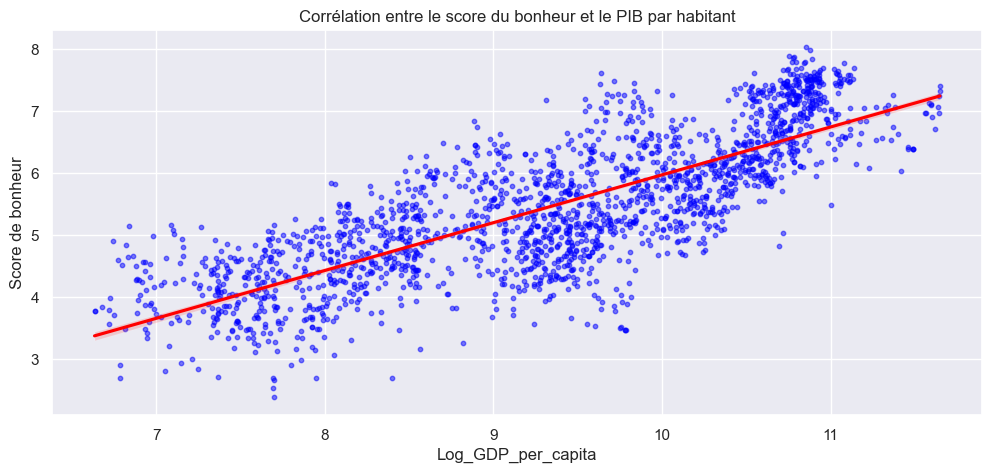

In [123]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Log_GDP_per_capita", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et le PIB par habitant")
plt.xlabel("Log_GDP_per_capita")
plt.ylabel("Score de bonheur")
plt.show()

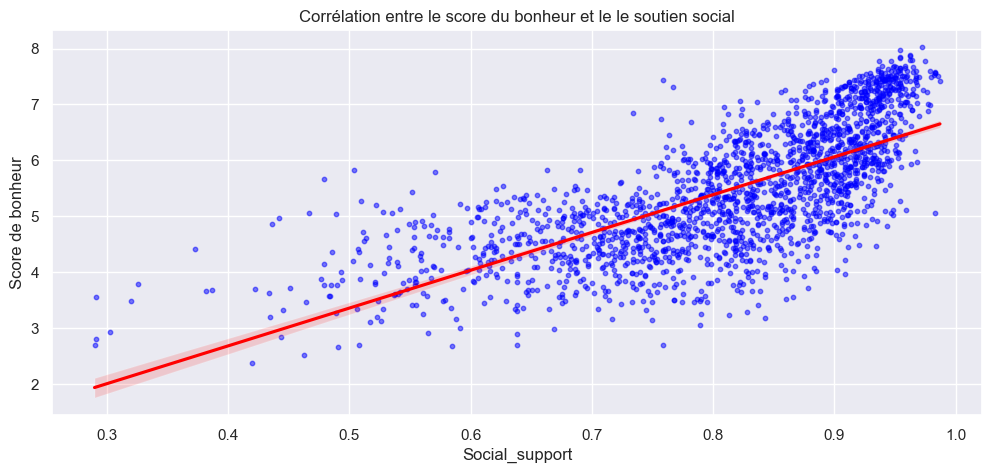

In [124]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Social_support", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et le le soutien social")
plt.xlabel("Social_support")
plt.ylabel("Score de bonheur")
plt.show()

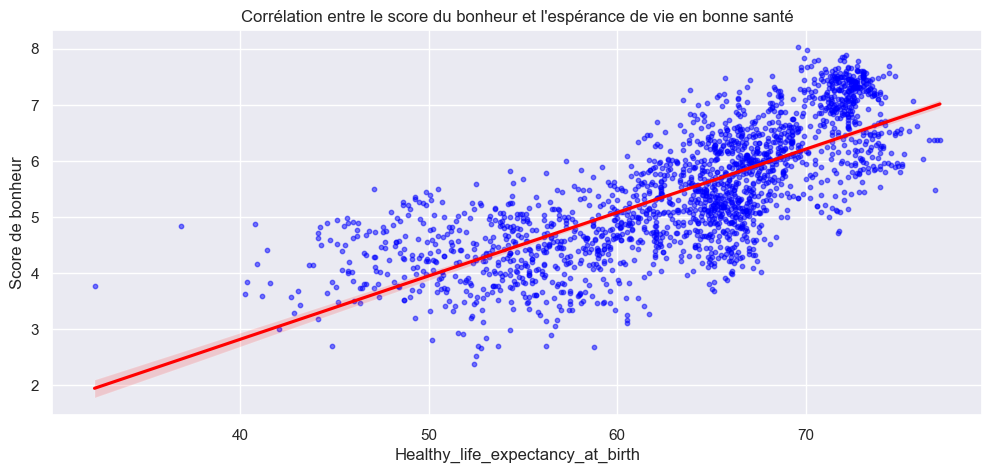

In [125]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Healthy_life_expectancy_at_birth", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et l'espérance de vie en bonne santé")
plt.xlabel("Healthy_life_expectancy_at_birth")
plt.ylabel("Score de bonheur")
plt.show()

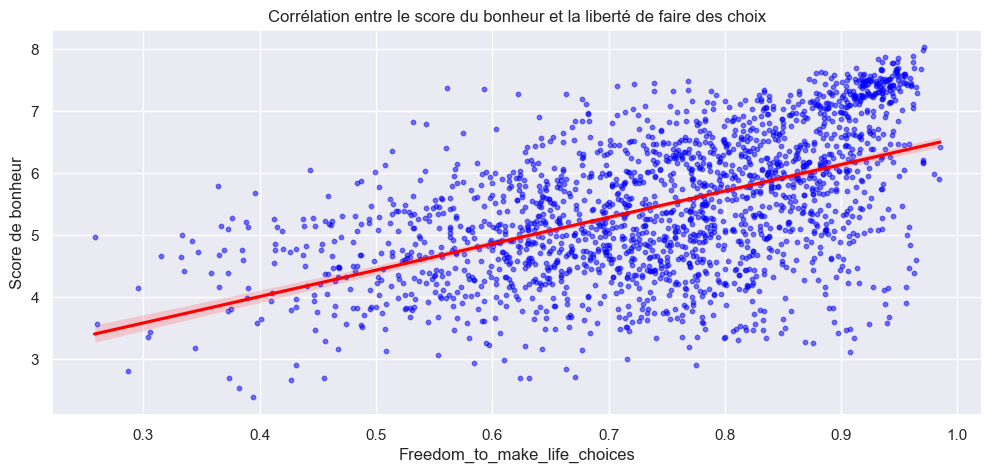

In [126]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Freedom_to_make_life_choices", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et la liberté de faire des choix")
plt.xlabel("Freedom_to_make_life_choices")
plt.ylabel("Score de bonheur")
plt.show()

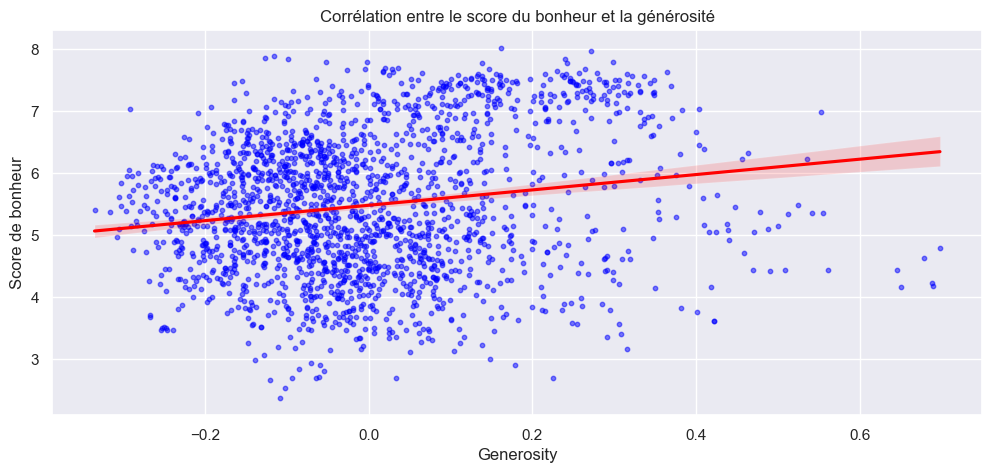

In [127]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Generosity", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et la générosité")
plt.xlabel("Generosity")
plt.ylabel("Score de bonheur")
plt.show()

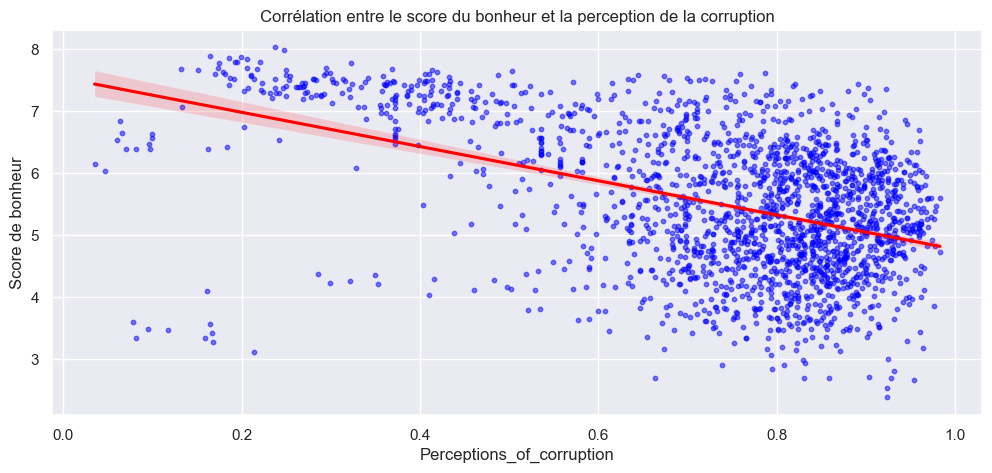

In [128]:
fig = plt.figure(figsize=(12, 5))
sns.set_theme()
sns.regplot(data=df, x="Perceptions_of_corruption", y="Life_Ladder",
            line_kws={"color": "red"}, scatter_kws={"s": 10, "alpha": 0.5, "color": "blue"})
plt.title("Corrélation entre le score du bonheur et la perception de la corruption")
plt.xlabel("Perceptions_of_corruption")
plt.ylabel("Score de bonheur")
plt.show()

# CLASSEMENTS TOP 10 ET BOTTOM 10 DES PAYS SELON LE SCORE DU BONHEUR

In [129]:
df_mean_per_country = df.groupby("Country_name", as_index=False)["Life_Ladder"].mean().sort_values(by="Life_Ladder", ascending=False)

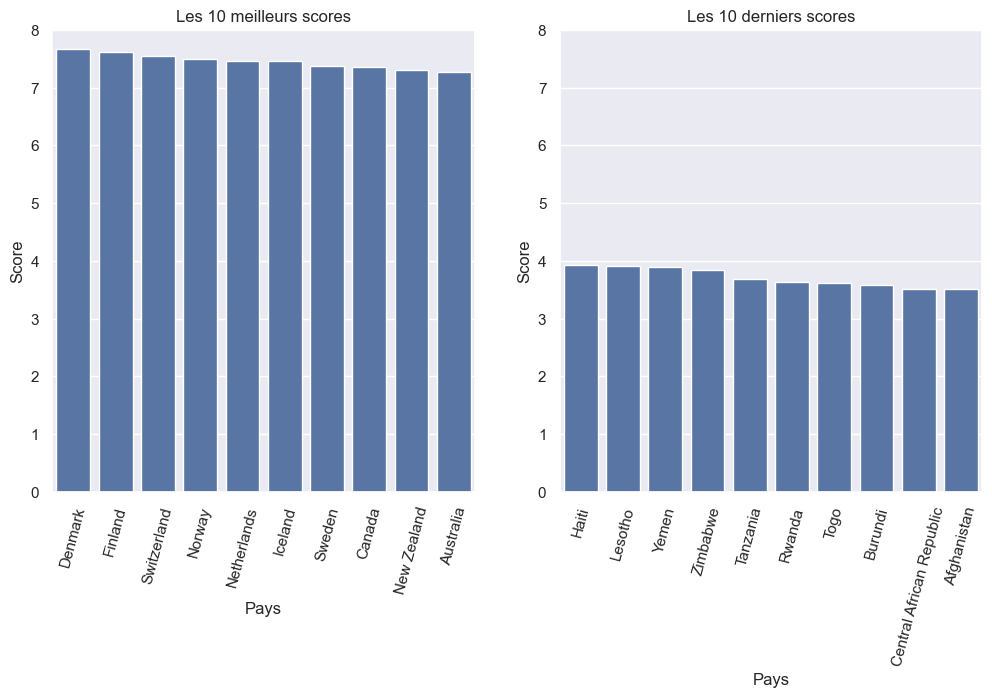

In [130]:
# Les 10 meilleurs
top_10 = df_mean_per_country.head(10)
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.set_theme()
sns.barplot(ax=axs[0], data=top_10, x="Country_name", y="Life_Ladder", color ="b")
axs[0].set_title("Les 10 meilleurs scores")
axs[0].set_xlabel("Pays")
axs[0].set_ylabel("Score")
axs[0].set_ylim([0, 8])
axs[0].xaxis.set_tick_params(rotation=75)

# Les 10 derniers
bottom_10 = df_mean_per_country.tail(10)
sns.barplot(ax=axs[1], data=bottom_10, x="Country_name", y="Life_Ladder", color = "b")
axs[1].set_title("Les 10 derniers scores")
axs[1].set_xlabel("Pays")
axs[1].set_ylabel("Score")
axs[1].set_ylim([0, 8])
axs[1].xaxis.set_tick_params(rotation=75)

plt.show()

In [131]:
df_mean_per_country_region = df.groupby(["Country_name", "Regional_indicator"], as_index=False)["Life_Ladder"].mean().sort_values(by="Life_Ladder", ascending=False)

In [132]:
df_mean_per_country_region.head(10)

,Country_name,Regional_indicator,Life_Ladder
38,Denmark,Western Europe,7.676625
46,Finland,Western Europe,7.614643
138,Switzerland,Western Europe,7.550364
110,Norway,Western Europe,7.501455
103,Netherlands,Western Europe,7.466133
61,Iceland,Western Europe,7.458444
137,Sweden,Western Europe,7.369063
25,Canada,North America and ANZ,7.359250
104,New Zealand,North America and ANZ,7.308067
6,Australia,North America and ANZ,7.275467


In [133]:
df_mean_per_country_region.tail(10)

,Country_name,Regional_indicator,Life_Ladder
57,Haiti,Latin America and Caribbean,3.925917
81,Lesotho,Sub-Saharan Africa,3.905000
158,Yemen,Middle East and North Africa,3.892692
160,Zimbabwe,Sub-Saharan Africa,3.836500
142,Tanzania,Sub-Saharan Africa,3.692687
122,Rwanda,Sub-Saharan Africa,3.636000
144,Togo,Sub-Saharan Africa,3.610200
22,Burundi,Sub-Saharan Africa,3.586000
26,Central African Republic,Sub-Saharan Africa,3.515000
0,Afghanistan,South Asia,3.512231


# SAUVEGARDE DATASET PRET POUR MODELISATION